Explore a practice dataset by implementing a linear regression in five steps:

1) Plot each independent variable against the dependent variable and take note of any obvious relationships.

2) Break the data into a training set and a test set.

3) Build a few regression models using the training set. Each model is choosing what variables to include and doing this: model = sm.OLS(y_train, X_train) results = model.fit()

4) According to these models what can you say about the sign and certainty of the relationships between the variables in the data? Do the independent variables have a linear relationship with the dependent variable?

5) Apply the results of each of these regression models to predict the values the dependent variable should take on in the test sample. Compare the models using the adjusted R2 - which model performs the best in the test sample?


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('Practice_data.csv')
data

,Ind_Variable_1,Ind_Variable_2,Ind_Variable_3,Ind_Variable_4,Ind_Variable_5,Ind_Variable_6,Dep_Variable
0,-0.662927,0.481136,0.247215,1.958167,4.470671,0.036799,4.945552
1,1.582828,0.306494,1.548229,-0.707931,1.871754,0.011579,-1.196168
2,-0.559416,0.022729,1.553344,0.147306,-3.719343,0.213217,-1.244103
3,-1.741017,0.366741,0.474254,0.111505,5.226183,0.327708,-2.516572
4,0.139236,0.244032,1.335525,-1.731315,0.091636,0.516423,-12.755672
5,-1.819978,0.186095,1.011756,-0.016298,1.833140,0.386569,-0.133819
6,-1.284562,0.493078,2.649681,0.000309,-0.299986,0.430742,-2.465938
7,-0.009263,0.137327,2.958430,-0.556114,-0.209658,0.034791,-2.705380
8,-1.471854,0.506331,2.130088,0.482793,1.428947,0.905441,-2.467406
9,-0.145718,0.113233,2.771558,-0.105827,0.111977,0.139857,-2.696656


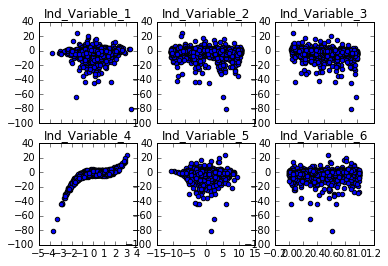

In [27]:
f, axarr = plt.subplots(2, 3)
axarr[0, 0].scatter(data['Ind_Variable_1'], data['Dep_Variable'])
axarr[0, 0].set_title('Ind_Variable_1')
axarr[0, 1].scatter(data['Ind_Variable_2'], data['Dep_Variable'])
axarr[0, 1].set_title('Ind_Variable_2')
axarr[0, 2].scatter(data['Ind_Variable_3'], data['Dep_Variable'])
axarr[0, 2].set_title('Ind_Variable_3')
axarr[1, 0].scatter(data['Ind_Variable_4'], data['Dep_Variable'])
axarr[1, 0].set_title('Ind_Variable_4')
axarr[1, 1].scatter(data['Ind_Variable_5'], data['Dep_Variable'])
axarr[1, 1].set_title('Ind_Variable_5')
axarr[1, 2].scatter(data['Ind_Variable_6'], data['Dep_Variable'])
axarr[1, 2].set_title('Ind_Variable_6')
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False);
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False);



In [43]:
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm

ind_var=["Ind_Variable_4"]
dep_var=["Dep_Variable"]

X_train, X_test, y_train, y_test = train_test_split(data[ind_var], data[dep_var], test_size=0.33, random_state=42)

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Dep_Variable   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     993.5
Date:                Mon, 18 Apr 2016   Prob (F-statistic):          1.39e-163
Time:                        10:48:20   Log-Likelihood:                -3857.2
No. Observations:                1340   AIC:                             7716.
Df Residuals:                    1339   BIC:                             7722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Ind_Variable_4     3.8359      0.122     31.520      0.000         3.597     4.075
==============================================================================
Omnibus:                     1169.421   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66222.324
Skew:                          -3.743   Prob(JB):                         0.00
Kurtosis:                      36.616   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""